### Question 1

In [16]:
#Reading file and content from user 
import docx
document = docx.Document('Brexit.docx')
content=[]
for each in document.paragraphs:
    content.append(each.text)
content=" ".join(content)

#NGram Function
import nltk
def GetNGrams(string,n):
    tokens=nltk.tokenize.word_tokenize(string)
    return list(nltk.ngrams(tokens,n))

### Question 2

In [28]:
def GetPOSTags(string):
    tokens=nltk.word_tokenize(string)
    pos_tags=nltk.pos_tag(tokens)
    return pos_tags

In [50]:
#Number of Nouns
def NounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Pronouns    
def PronounsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['PRP','PRP$']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Verbs    
def VerbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adjectives    
def AdjectivesCount(string):
    POSTags=GetPOSTags(string)
    allForms=['JJ','JJR','JJS']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

#Number of Adverbs    
def AdverbsCount(string):
    POSTags=GetPOSTags(string)
    allForms=['RB','RBR']
    count=0
    for word,tag in POSTags:
        if tag in allForms:
            count+=1
    return count

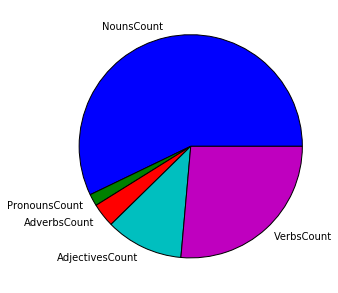

In [52]:
#Plotting a pie chart

nouns=NounsCount(content)
pronouns=PronounsCount(content)
adjectives=AdjectivesCount(content)
adverbs=AdverbsCount(content)
verbs=VerbsCount(content)
allTags=[nouns,pronouns,adverbs,adjectives,verbs]
labels=['NounsCount','PronounsCount','AdverbsCount','AdjectivesCount','VerbsCount']

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(allTags,labels=labels)
plt.show()

### Question 3

In [88]:
# Run nltk.download('maxent_ne_chunker') and nltk.download('words') to use 'NE Chunk'
import nltk
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

In [89]:
#Number of GeoPolitical entities 
def GeoPoliticalCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="GPE":
            count+=1
    return count

#Number of Persons   
def PersonsCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="PERSON":
            count+=1
    return count

#Number of Organizations
def OrganizationCount(string):
    NER=GetNERTags(string)
    count=0
    for each in NER:
        if hasattr(each, 'label') and each.label()=="ORGANIZATION":
            count+=1
    return count


### Question 4

In [100]:
#Most frequent bi-gram from the data
from collections import Counter
bigrams=GetNGrams(content,2)
c=Counter(bigrams)
c.most_common(1)

[((u',', u'the'), 7)]

In [106]:
#Most frequent Noun Entity
from collections import Counter
import nltk

tokens=nltk.word_tokenize(content)
pos_tags=nltk.pos_tag(tokens)
allFormsOfNoun=['NN','NNP','NNS','NNPS']
allNouns=[]
for word,tag in pos_tags:
    if tag in allFormsOfNoun:
        allNouns.append((word))
c=Counter(allNouns)
c.most_common(1)

[(u'UK', 10)]

In [111]:
#Most frequent GeoPolitical Entity
from collections import Counter
import nltk

#use the function created above
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

#Get it for content of the file
NER=GetNERTags(content)
GlobalPoliticalEntities=[]
for each in NER:
    if hasattr(each, 'label') and each.label()=="GPE":
        GlobalPoliticalEntities.append(each[0][0])

c=Counter(GlobalPoliticalEntities)
c.most_common(1)

[(u'EU', 6)]

In [112]:
#Most frequent Person
from collections import Counter
import nltk

#use the function created above
from nltk import ne_chunk
def GetNERTags(string):
    tokens=nltk.word_tokenize(string)
    POSTags=nltk.pos_tag(tokens)
    NER=ne_chunk(POSTags)
    return NER

#Get it for content of the file
NER=GetNERTags(content)
PERSON=[]
for each in NER:
    if hasattr(each, 'label') and each.label()=="PERSON":
        PERSON.append(each[0][0])

c=Counter(PERSON)
c.most_common(1)

[(u'Brexit', 2)]